<a href="https://colab.research.google.com/github/pbannuru/DEEP-LEARNING/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

root = "/content/drive/MyDrive/cnn image dataset"
os.chdir(root)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.listdir()

['pexels-mike-b-100656.jpg',
 '3-2-car-free-download-png.png',
 'car_grayscale.jpeg']

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [6]:
car1 = mpimg.imread("3-2-car-free-download-png.png")

In [5]:
car_img_path = "3-2-car-free-download-png.png"

In [7]:
car1.shape

(1200, 2048, 4)

In [8]:
type(car1)

numpy.ndarray

In [12]:
car1[0][0]

array([1., 1., 1., 0.], dtype=float32)

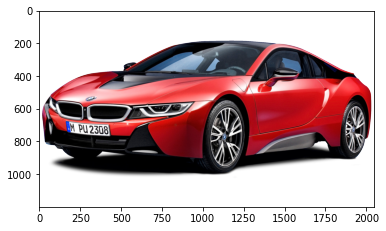

In [9]:
plt.imshow(car1)

In [15]:
car1_cv2 = cv2.imread("3-2-car-free-download-png.png")

In [11]:
cv2.imshow("image",car1.cv2) # this dont work in colab

AttributeError: ignored

In [16]:
from google.colab.patches import cv2_imshow

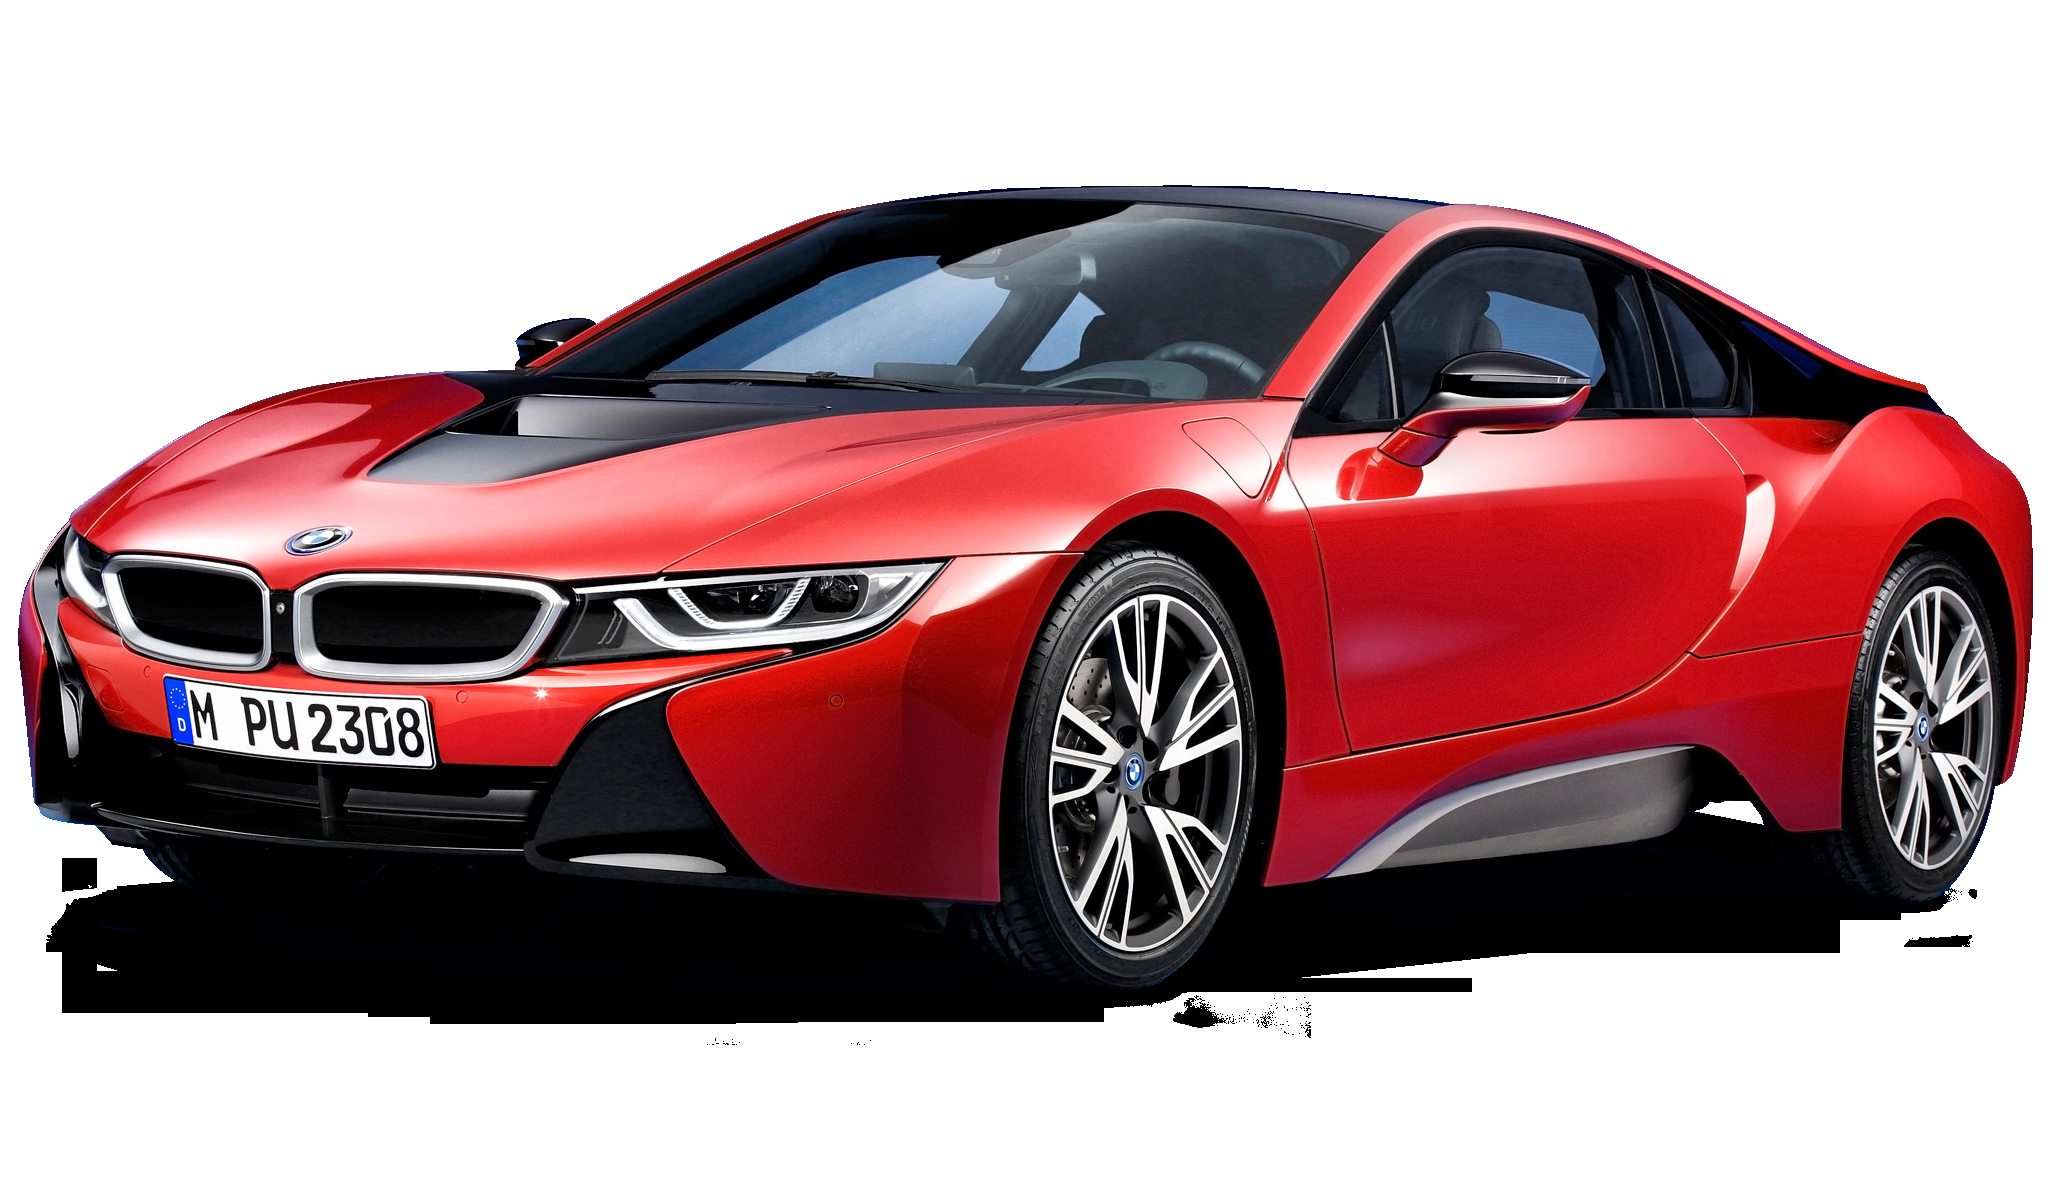

In [17]:
cv2_imshow(car1_cv2)

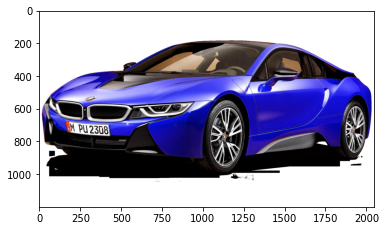

In [18]:
plt.imshow(car1_cv2) # cv2 reads images as BGR 

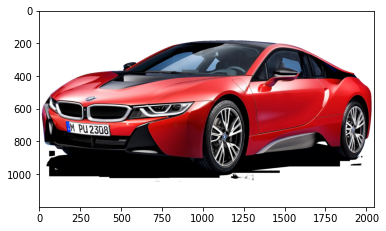

In [20]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

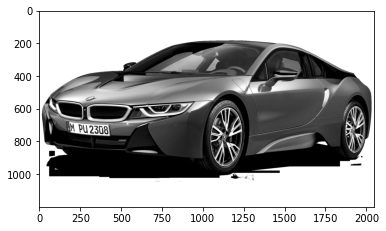

In [22]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap = 'gray')

In [23]:
car1_cv2_BGR_GRAY.shape

(1200, 2048)

UNDERSTANDING COMPOSITION OF COLOURS

In [24]:
def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)

  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]  # ravel() does flattening operation, create a list

  ax[0,0].set_title("Original Image")
  # ax[0,0].set_axis_off()
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))


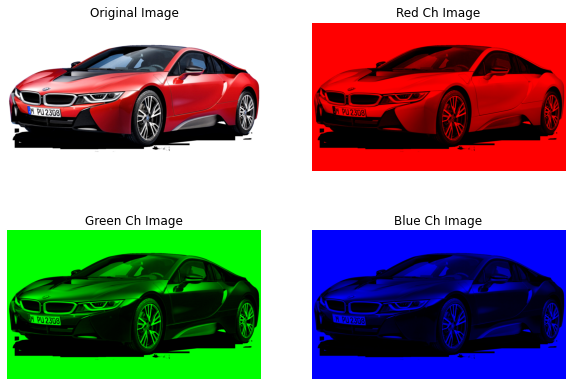

In [25]:
viusalize_RGB_channel(imgArray=car1_cv2)

In [26]:
random_colored_img = np.random.randint(0, 255, (6,6,3))
random_colored_img.shape

(6, 6, 3)

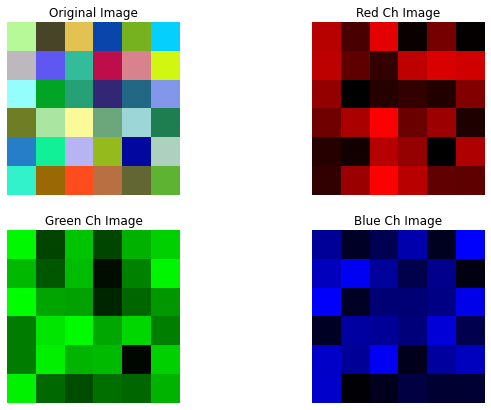

In [27]:
viusalize_RGB_channel(imgArray=random_colored_img)

In [28]:
sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])

print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [29]:
print("highlighting Horizontal edges:\n", sobel.T)

highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [30]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

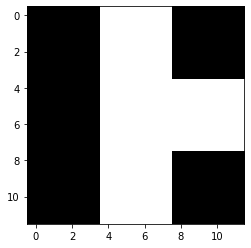

In [31]:
plt.imshow(example1, cmap="gray")

In [36]:
def simple_conv(imgFilter=None, picture=None):
  # extract the shape of the image
  p_row, p_col = picture.shape

  k = imgFilter.shape[0] # k =3

  temp = list()

  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontal right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic)) # row sum , column sum
      temp.append(z)
  
  resulant_image = np.array(temp).reshape(final_rows, final_cols)
  return resulant_image

In [34]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

In [35]:
sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [33]:
k = 3
v_stride = 0
h_stride = 0 + 1 + 1
target_area = example1[v_stride: v_stride + k, h_stride: h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [38]:
result = simple_conv(imgFilter = sobel,picture = example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

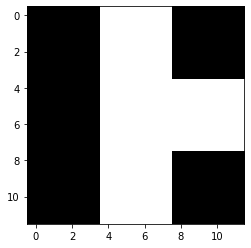

In [40]:
plt.imshow(example1, cmap="gray")

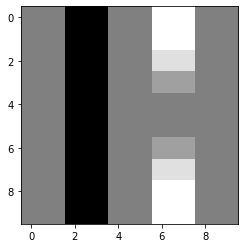

In [39]:
plt.imshow(result,cmap = 'gray')

In [41]:
result = simple_conv(imgFilter = sobel.T,picture = example1)
result

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,  -255,  -765, -1020,
        -1020],
       [    0,     0,     0,     0,     0,     0,  -255,  -765, -1020,
        -1020],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,   255,   765,  1020,
         1020],
       [    0,     0,     0,     0,     0,     0,   255,   765,  1020,
         1020],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

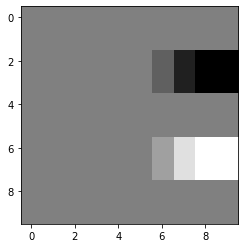

In [42]:
plt.imshow(result,cmap = 'gray')

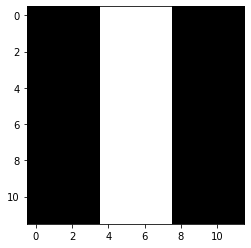

In [43]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

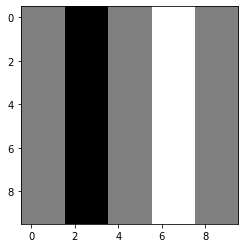

In [46]:
result = simple_conv(imgFilter = sobel,picture = example2)
plt.imshow(result, cmap="gray")

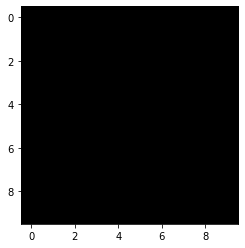

In [47]:
result = simple_conv(imgFilter = sobel.T,picture = example2)
plt.imshow(result, cmap="gray")

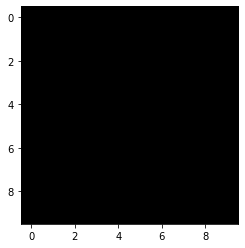

In [48]:
result = simple_conv(imgFilter = sobel,picture = example2.T)
plt.imshow(result, cmap="gray")

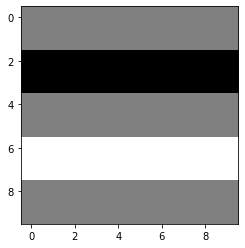

In [49]:
result = simple_conv(imgFilter = sobel.T,picture = example2.T)
plt.imshow(result, cmap="gray")

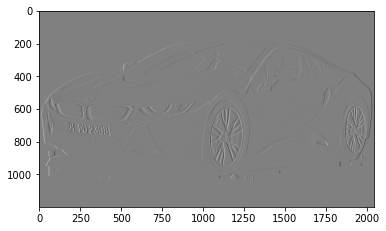

In [50]:
result = simple_conv(imgFilter = sobel,picture = car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

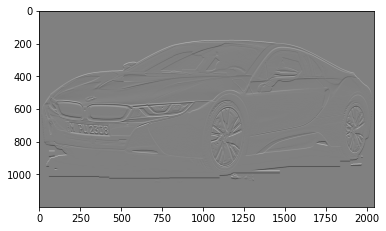

In [51]:
result = simple_conv(imgFilter = sobel.T,picture = car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [52]:
# to find out filters in auto we use CNN unlike this manual giving of filter